In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from api_import import *
#import api_import 

In [2]:
#data = np.genfromtxt("2013_gaz_tracts_36.txt",delimiter=",",)
data = pd.read_csv("../data/gazetter_tracts/2013_gaz_tracts_36.txt",header=0,dtype={'GEOID': np.int64, 
        'ALAND': float, 'AWATER': float, 'ALAND_SQMI': float, 'AWATER_SQMI': float, 
        'INTPTLAT': float, 'INTPTLONG': float})

In [3]:
data.head(5)

,USPS,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,NY,36001000100,2367456,245021,0.914,0.095,42.663754,-73.736909
1,NY,36001000200,2065161,0,0.797,0.000,42.664413,-73.751504
2,NY,36001000300,5779329,55326,2.231,0.021,42.680614,-73.783004
3,NY,36001000401,9017989,134152,3.482,0.052,42.702508,-73.866753
4,NY,36001000403,3138700,0,1.212,0.000,42.676874,-73.805264


In [4]:
#add state, county, county, tract id, block id information to data frame
data['STATE'] = ''
data['STATE_ID'] = ''
data['GEOID'] = data['GEOID'].astype("str")
data['BOROUGH'] = ''
data['COUNTY_ID'] = ''
data['TRACT_ID'] = ''
data['LATMIN'] = 0.0
data['LATMAX'] = 0.0
data['LONGMIN'] = 0.0
data['LONGMAX'] = 0.0
data['ZIPCODE'] = ''
data['FRAC_LAND'] = data['ALAND'] / (data['ALAND'] + data['AWATER'])

## ---IGNORING ZIP CODES SINCE THEY ARE MAIL ROUTES AND NOT ALWAYS MAPPED CORRECTLY TO TRACT + COUNTY CODE COMBINATIONS

In [5]:
#ziplist = zip_tract_dict.keys() #if y[0] == '61']
data.head(5)

,USPS,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,STATE,STATE_ID,BOROUGH,COUNTY_ID,TRACT_ID,LATMIN,LATMAX,LONGMIN,LONGMAX,ZIPCODE,FRAC_LAND
0,NY,36001000100,2367456,245021,0.914,0.095,42.663754,-73.736909,,,,,,0,0,0,0,,0.906211
1,NY,36001000200,2065161,0,0.797,0.000,42.664413,-73.751504,,,,,,0,0,0,0,,1.000000
2,NY,36001000300,5779329,55326,2.231,0.021,42.680614,-73.783004,,,,,,0,0,0,0,,0.990518
3,NY,36001000401,9017989,134152,3.482,0.052,42.702508,-73.866753,,,,,,0,0,0,0,,0.985342
4,NY,36001000403,3138700,0,1.212,0.000,42.676874,-73.805264,,,,,,0,0,0,0,,1.000000


In [6]:
#function to parse GEOID
def parse_geoid(geoidstr):
    return geoidstr[:2],geoidstr[2:5],geoidstr[5:]

In [7]:
#http://msi.nga.mil/MSISiteContent/StaticFiles/Calculators/degree.html to get meters->lat, long
#latitude (NYC) = 40.7 degrees
#1 degree of latitude = 111048 meters
#1 degree of longitude = 84515 meters 
for irow, row in data.iterrows():
    state, county, tract =  parse_geoid(row['GEOID'])
    data.ix[irow,'STATE_ID'] = state
    data.ix[irow,'COUNTY_ID'] = county
    data.ix[irow,'TRACT_ID'] = tract
    #data.ix[irow,'BLOCK_ID'] = block
    length = np.sqrt(row['ALAND'] + row['AWATER'])  #in meters
    dlat = 0.5 * length * (1./111048.)
    dlon = 0.5 * length * (1./84515.)
    data.ix[irow,'LATMIN'], data.ix[irow,'LATMAX'] = row['INTPTLAT'] - dlat, row['INTPTLAT'] + dlat
    data.ix[irow,'LONGMIN'], data.ix[irow,'LONGMAX'] = row['INTPTLONG'] - dlon, row['INTPTLONG'] + dlon

In [8]:
data.loc[data.COUNTY_ID == "061","BOROUGH"] = "Manhattan"
data.loc[data.COUNTY_ID == "047","BOROUGH"] = "Brooklyn"
data.loc[data.COUNTY_ID == "081","BOROUGH"] = "Queens"
data.loc[data.COUNTY_ID == "085","BOROUGH"] = "Staten"
data.loc[data.COUNTY_ID == "005","BOROUGH"] = "Bronx"
data.BOROUGH.unique()

array(['', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten'], dtype=object)

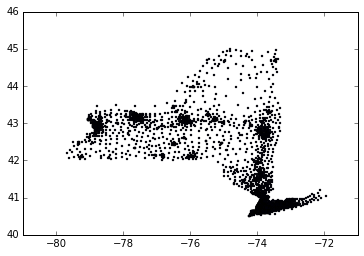

In [9]:
#plot of new york from census tracts
plt.scatter(data['INTPTLONG'],data['INTPTLAT'],s=2)

In [10]:
#Create subsets for nyc 5 boroughs and for manhattan only
nyc = data[(data['COUNTY_ID'] == "061") | (data['COUNTY_ID'] == "047") | 
           (data['COUNTY_ID'] == "005") | (data['COUNTY_ID'] == "081") | 
           (data['COUNTY_ID'] == "085")].reset_index(drop=True)

In [11]:
nyc.head()

,USPS,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,STATE,STATE_ID,BOROUGH,COUNTY_ID,TRACT_ID,LATMIN,LATMAX,LONGMIN,LONGMAX,ZIPCODE,FRAC_LAND
0,NY,36005000100,1672467,1032658,0.646,0.399,40.793492,-73.883532,,36,Bronx,005,000100,40.786087,40.800898,-73.893262,-73.873801,,0.618259
1,NY,36005000200,455322,926899,0.176,0.358,40.803486,-73.860438,,36,Bronx,005,000200,40.798192,40.808779,-73.867393,-73.853482,,0.329413
2,NY,36005000400,912391,602945,0.352,0.233,40.808915,-73.850488,,36,Bronx,005,000400,40.803373,40.814458,-73.857771,-73.843206,,0.602105
3,NY,36005001600,485079,0,0.187,0.000,40.818848,-73.858076,,36,Bronx,005,001600,40.815712,40.821984,-73.862197,-73.853956,,1.000000
4,NY,36005001900,1656134,1139660,0.639,0.440,40.800999,-73.909373,,36,Bronx,005,001900,40.793470,40.808528,-73.919265,-73.899481,,0.592366


In [12]:
nyc.set_index(['COUNTY_ID', 'TRACT_ID'],inplace=True,drop=True)

In [12]:
#zip_tract_dict = zip_to_tract()
tract_zip_dict = tract_to_zip()
for irow, row in nyc.iterrows():
    if irow in tract_zip_dict.keys():
        nyc.ix[irow,'ZIPCODE'] = tract_zip_dict[irow]
    else:
        nyc.ix[irow,'ZIPCODE'] = "00000"

In [13]:
nyc.head(5)

,USPS,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,STATE,STATE_ID,BOROUGH,COUNTY_ID,TRACT_ID,LATMIN,LATMAX,LONGMIN,LONGMAX,ZIPCODE,FRAC_LAND
0,NY,36005000100,1672467,1032658,0.646,0.399,40.793492,-73.883532,,36,Bronx,005,000100,40.786087,40.800898,-73.893262,-73.873801,00000,0.618259
1,NY,36005000200,455322,926899,0.176,0.358,40.803486,-73.860438,,36,Bronx,005,000200,40.798192,40.808779,-73.867393,-73.853482,00000,0.329413
2,NY,36005000400,912391,602945,0.352,0.233,40.808915,-73.850488,,36,Bronx,005,000400,40.803373,40.814458,-73.857771,-73.843206,00000,0.602105
3,NY,36005001600,485079,0,0.187,0.000,40.818848,-73.858076,,36,Bronx,005,001600,40.815712,40.821984,-73.862197,-73.853956,00000,1.000000
4,NY,36005001900,1656134,1139660,0.639,0.440,40.800999,-73.909373,,36,Bronx,005,001900,40.793470,40.808528,-73.919265,-73.899481,00000,0.592366


In [15]:
#manhattan = nyc.iloc(nyc['COUNTY_ID'] == "061",:]
manhattan = nyc.ix["061"]

KeyError: '061'

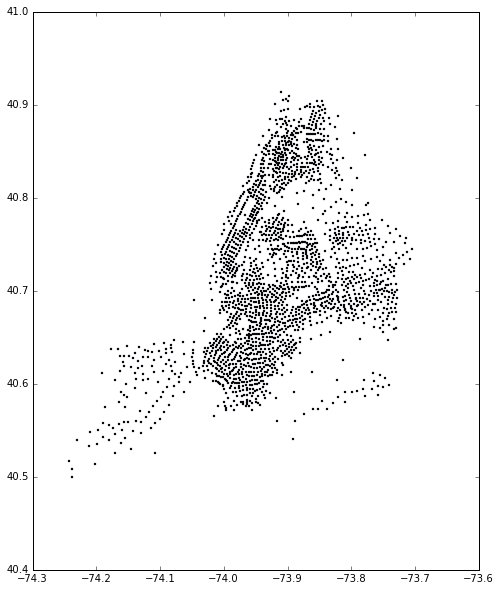

In [14]:
#Plot of NYC color-coded by borough! 
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (8,10)
plt.scatter(nyc['INTPTLONG'],nyc['INTPTLAT'],s=2)
plt.scatter(nyc.ix["061"]['INTPTLONG'],nyc.ix["061"]['INTPTLAT'],s=2,color='red',alpha=0.5)
plt.scatter(nyc.ix["047"]['INTPTLONG'],nyc.ix["047"]['INTPTLAT'],s=2,color='blue',alpha=0.5)
plt.scatter(nyc.ix["081"]['INTPTLONG'],nyc.ix["081"]['INTPTLAT'],s=2,color='green',alpha=0.5)
plt.scatter(nyc.ix["085"]['INTPTLONG'],nyc.ix["085"]['INTPTLAT'],s=2,color='purple',alpha=0.5)
plt.scatter(nyc.ix["005"]['INTPTLONG'],nyc.ix["005"]['INTPTLAT'],s=2,color='yellow',alpha=0.5)

In [ ]:
#Fraction of NYC census tracts that are 100% over land = 90%
mpl.rcParams["figure.figsize"] = (8,3)
nyc['FRAC_LAND'].hist(bins=10)

In [ ]:
print "fraction of tract census areas 90% land = ",float(len(nyc[nyc['FRAC_LAND'] > 0.90]))/len(nyc['FRAC_LAND'])

In [ ]:
mpl.rcParams["figure.figsize"] = (4,6)
plt.scatter(manhattan['INTPTLONG'],manhattan['INTPTLAT'],s=3)

In [ ]:
#print manhattan[:,['LONGMIN','LONGMAX','LATMIN','LATMAX']]
print manhattan.index

In [ ]:
#--------------------------

###Combine Geographical Data with Population, Economic, Demographic Data

In [2]:
#specify features in census database
census_vars = [["cty", {"description": "County", "name": "COUNTY_ID"}],
               ["tr", {"description": "Tract", "name": "TRACT_ID"}],
["DP03_0051E", {"description": "Total households", "name": "hh_total"}],
["DP03_0052E" , {"description": "Total households < 10,000","name": "hh1"}],
["DP03_0053E" , {"description": "Total households 10,000 to 14,999","name": "hh2"}],
["DP03_0054E" , {"description": "Total households 15,000 to 24,999","name": "hh3"}],
["DP03_0055E" , {"description": "Total households 25,000 to 34,999","name": "hh4"}],
["DP03_0056E" , {"description": "Total households 35,000 to 49,999","name": "hh5"}],
["DP03_0057E" , {"description": "Total households 50,000 to 74,999","name": "hh6"}],
["DP03_0058E" , {"description": "Total households 75,000 to 99,999","name": "hh7"}],
["DP03_0059E" , {"description": "Total households 100,000 to 149,999","name": "hh8"}],
["DP03_0060E" , {"description": "Total households 150,000 to 199,999","name": "hh9"}],
["DP03_0061E" , {"description": "Total households 200,000 + ","name": "hh10"}],
["DP03_0062E" , {"description": "Total households MEDIAN income","name": "hhmedian"}], #dollars
["DP03_0063E" , {"description": "Total households MEAN income","name": "hhmean"}],   #dollars
["DP04_0088E" , {"description": "Median Value Owner Occupied Units","name": "median_owned"}],
["DP04_0132E" , {"description": "Median Gross Rent","name": "median_rent"}],
["DP05_0001E" , {"description": "Total population","name": "pop_total"}],
["DP05_0004E" , {"description": "Total population less than 5 years old","name": "pop1"}],
["DP05_0005E" , {"description": "Total population 5 to 9 years old","name": "pop2"}],
["DP05_0006E" , {"description": "Total population 10 to 14 years old","name": "pop3"}],
["DP05_0007E" , {"description": "Total population 15 to 19 years old","name": "pop4"}],
["DP05_0008E" , {"description": "Total population 20 to 24 years old","name": "pop5"}],
["DP05_0009E" , {"description": "Total population 25 to 34 years old","name": "pop6"}],
["DP05_0010E" , {"description": "Total population 35 to 44 years old","name": "pop7"}],
["DP05_0011E" , {"description": "Total population 45 to 54 years old","name": "pop8"}],
["DP05_0012E" , {"description": "Total population 55 to 59 years old","name": "pop9"}],
["DP05_0013E" , {"description": "Total population 60 to 64 years old","name": "pop10"}],
["DP05_0014E" , {"description": "Total population 65 to 74 years old","name": "pop11"}],
["DP05_0015E" , {"description": "Total population 75 to 84 years old","name": "pop12"}],
["DP05_0016E" , {"description": "Total population 85+","name": "pop13"}],
["DP05_0039E" , {"description": "Race: Asian","name": "pop_asian"}],
["DP05_0033E" , {"description": "Race: African American","name": "pop_black"}],
["DP05_0032E" , {"description": "Race: White","name": "pop_white"}],
["DP05_0034E" , {"description": "Race: Native American","name": "pop_native"}],
["DP05_0047E" , {"description": "Race: Native Hawaiian and Other Pacific Islander","name": "pop_pacific"}],
["DP05_0066E" , {"description": "Hispanic and Latino of any race","name": "pop_latino"}],
["DP05_0067E" , {"description": "Ethnicity: Mexican","name": "pop_mexican"}],
["DP05_0068E" , {"description": "Ethnicity: Puerto Rican","name": "pop_puertorican"}],
["DP05_0069E" , {"description": "Ethnicity: Cuban","name": "pop_cuban"}],
["DP05_0040E" , {"description": "Ethnicity: Indian/Pakistani","name": "pop_indpak"}],
["DP05_0041E" , {"description": "Ethnicity: Chinese","name": "pop_chinese"}],
["DP05_0042E" , {"description": "Ethnicity: Filipino","name": "pop_filipino"}],
["DP05_0043E" , {"description": "Ethnicity: Japanese","name": "pop_japanese"}],
["DP05_0044E" , {"description": "Ethnicity: Korean","name": "pop_korean"}],
["DP05_0045E" , {"description": "Ethnicity: Vietnamese","name": "pop_vietnamese"}],
["DP02_0132E" , {"description": "Ancestry: Greek","name": "pop_greek"}],  #note ancestry vs ethnicity in census data
["DP02_0134E" , {"description": "Ancestry: Irish","name": "pop_irish"}],  #note ancestry vs ethnicity in census data
["DP02_0135E" , {"description": "Ancestry: Italian","name": "pop_italian"}],  #note ancestry vs ethnicity in census data
["DP02_0138E" , {"description": "Ancestry: Polish","name": "pop_polish"}],  #note ancestry vs ethnicity in census data
["DP02_0139E" , {"description": "Ancestry: Portuguese","name": "pop_portuguese"}],  #note ancestry vs ethnicity in census data
["DP02_0140E" , {"description": "Ancestry: Russian","name": "pop_russian"}]]  #note ancestry vs ethnicity in census data

census_vars_keys = [x[0] for x in census_vars]
census_vars_names = [x[1]["name"] for x in census_vars]

print census_vars_keys
print census_vars_names

['cty', 'tr', 'DP03_0051E', 'DP03_0052E', 'DP03_0053E', 'DP03_0054E', 'DP03_0055E', 'DP03_0056E', 'DP03_0057E', 'DP03_0058E', 'DP03_0059E', 'DP03_0060E', 'DP03_0061E', 'DP03_0062E', 'DP03_0063E', 'DP04_0088E', 'DP04_0132E', 'DP05_0001E', 'DP05_0004E', 'DP05_0005E', 'DP05_0006E', 'DP05_0007E', 'DP05_0008E', 'DP05_0009E', 'DP05_0010E', 'DP05_0011E', 'DP05_0012E', 'DP05_0013E', 'DP05_0014E', 'DP05_0015E', 'DP05_0016E', 'DP05_0039E', 'DP05_0033E', 'DP05_0032E', 'DP05_0034E', 'DP05_0047E', 'DP05_0066E', 'DP05_0067E', 'DP05_0068E', 'DP05_0069E', 'DP05_0040E', 'DP05_0041E', 'DP05_0042E', 'DP05_0043E', 'DP05_0044E', 'DP05_0045E', 'DP02_0132E', 'DP02_0134E', 'DP02_0135E', 'DP02_0138E', 'DP02_0139E', 'DP02_0140E']
['COUNTY_ID', 'TRACT_ID', 'hh_total', 'hh1', 'hh2', 'hh3', 'hh4', 'hh5', 'hh6', 'hh7', 'hh8', 'hh9', 'hh10', 'hhmedian', 'hhmean', 'median_owned', 'median_rent', 'pop_total', 'pop1', 'pop2', 'pop3', 'pop4', 'pop5', 'pop6', 'pop7', 'pop8', 'pop9', 'pop10', 'pop11', 'pop12', 'pop13', 'po

In [3]:
bronx_df = query_census(census_vars_keys, "05")
manhattan_df = query_census(census_vars_keys, "61")
queens_df = query_census(census_vars_keys, "81")
brooklyn_df = query_census(census_vars_keys, "47")
staten_df = query_census(census_vars_keys, "85")

http://api.census.gov/data/2013/acs5/profile?get=cty,tr,DP03_0051E,DP03_0052E,DP03_0053E,DP03_0054E,DP03_0055E,DP03_0056E,DP03_0057E,DP03_0058E,DP03_0059E,DP03_0060E,DP03_0061E,DP03_0062E,DP03_0063E,DP04_0088E,DP04_0132E,DP05_0001E,DP05_0004E,DP05_0005E,DP05_0006E,DP05_0007E,DP05_0008E,DP05_0009E,DP05_0010E,DP05_0011E,DP05_0012E,DP05_0013E,DP05_0014E,DP05_0015E&for=tract:*&in=state:36+county:05&key=641a17d8852c486df8a332c73a53b8aec9ec801a
http://api.census.gov/data/2013/acs5/profile?get=cty,tr,DP05_0016E,DP05_0039E,DP05_0033E,DP05_0032E,DP05_0034E,DP05_0047E,DP05_0066E,DP05_0067E,DP05_0068E,DP05_0069E,DP05_0040E,DP05_0041E,DP05_0042E,DP05_0043E,DP05_0044E,DP05_0045E,DP02_0132E,DP02_0134E,DP02_0135E,DP02_0138E,DP02_0139E,DP02_0140E&for=tract:*&in=state:36+county:05&key=641a17d8852c486df8a332c73a53b8aec9ec801a
tr      cty
000100  005
000200  005
000400  005
001600  005
001900  005
002000  005
002300  005
002400  005
002500  005
002701  005
002702  005
002800  005
003100  005
003300  005


### Concatenate information for all boroughs
dfs = [manhattan_df,bronx_df,queens_df,brooklyn_df,staten_df]
census_df = pd.concat(dfs)
census_df = census_df.reset_index(drop=True)

In [4]:
census_df.rename(columns=dict(zip(census_vars_keys, census_vars_names)), inplace=True)
census_df.loc[census_df['hhmedian'] == "250,000+","hhmedian"] = "250000"
census_df.loc[census_df['hhmean'] == "250,000+","hhmean"] = "250000"
census_df.loc[census_df['hhmedian'] == "-","hhmedian"] = "NaN"
census_df.loc[census_df['hhmean'] == "-","hhmean"] = "NaN"
census_df.loc[census_df['hhmean'] == "N","hhmean"] = "NaN"

NameError: name 'census_df' is not defined

In [459]:
census_df.columns

Index([u'COUNTY_ID', u'TRACT_ID', u'hh_total', u'hh1', u'hh2', u'hh3', u'hh4', u'hh5', u'hh6', u'hh7', u'hh8', u'hh9', u'hh10', u'hhmedian', u'hhmean', u'pop_total', u'pop1', u'pop2', u'pop3', u'pop4', u'pop5', u'pop6', u'pop7', u'pop8', u'pop9', u'pop_asian', u'pop_black', u'pop_white', u'pop_native', u'pop_pacific', u'pop_latino', u'state', u'county', u'tract'], dtype='object')

In [460]:
#convert all the "strings" to numeric data PRIOR to merging with geographic data
for col in census_df.columns:
    if col not in ['COUNTY_ID', 'TRACT_ID']:
        census_df[col] = census_df[col].astype(float)

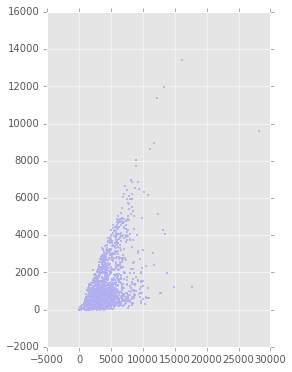

In [461]:
import matplotlib.pyplot as plt
plt.scatter(census_df['pop_total'],census_df['pop_latino'],s=3)

In [462]:
frac_latino = np.array(census_df['pop_latino'] / census_df['pop_total'])
print type(frac_latino)

<type 'numpy.ndarray'>


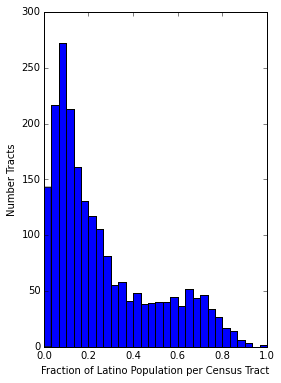

In [214]:
plt.hist(frac_latino[~np.isnan(frac_latino)],bins=30);
plt.xlabel("Fraction of Latino Population per Census Tract")
plt.ylabel("Number Tracts")

In [463]:
census_df.head(5)

,COUNTY_ID,TRACT_ID,hh_total,hh1,hh2,hh3,hh4,hh5,hh6,hh7,...,pop9,pop_asian,pop_black,pop_white,pop_native,pop_pacific,pop_latino,state,county,tract
0,061,000100,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,36,61,100
1,061,000201,940,208,139,235,39,77,142,51,...,34,1328,200,675,29,0,927,36,61,201
2,061,000202,3338,686,384,509,450,386,459,111,...,252,1429,991,3812,0,0,3766,36,61,202
3,061,000500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,36,61,500
4,061,000600,3912,1061,608,512,389,324,496,152,...,351,6940,877,1262,9,15,3063,36,61,600


In [464]:
census_df.set_index(['COUNTY_ID', 'TRACT_ID'],inplace=True,drop=True)
census_df.head(5)

0                   hh_total   hh1  hh2  hh3  hh4  hh5  hh6  hh7  hh8  hh9  \
COUNTY_ID TRACT_ID                                                           
061       000100           0     0    0    0    0    0    0    0    0    0   
          000201         940   208  139  235   39   77  142   51   39    0   
          000202        3338   686  384  509  450  386  459  111  218   33   
          000500           0     0    0    0    0    0    0    0    0    0   
          000600        3912  1061  608  512  389  324  496  152  250   16   

0                   ...    pop9  pop_asian  pop_black  pop_white  pop_native  \
COUNTY_ID TRACT_ID  ...                                                        
061       000100    ...       0          0          0          0           0   
          000201    ...      34       1328        200        675          29   
          000202    ...     252       1429        991       3812           0   
          000500    ...       0          0          0          0           0   
          000600    ...     351       6940        877       1262           9   

0                   pop_pacific  pop_latino  state  county  tract  
COUNTY_ID TRACT_ID                                                 
061       000100              0           0     36      61    100  
          000201              0         927     36      61    201  
          000202              0        3766     36      61    202  
          000500              0           0     36      61    500  
          000600             15        3063     36      61    600  

[5 rows x 32 columns]

In [465]:
nyc.head(5)

USPS        GEOID    ALAND   AWATER  ALAND_SQMI  \
COUNTY_ID TRACT_ID                                                   
005       000100     NY  36005000100  1672467  1032658       0.646   
          000200     NY  36005000200   455322   926899       0.176   
          000400     NY  36005000400   912391   602945       0.352   
          001600     NY  36005001600   485079        0       0.187   
          001900     NY  36005001900  1656134  1139660       0.639   

                    AWATER_SQMI   INTPTLAT  INTPTLONG STATE STATE_ID BOROUGH  \
COUNTY_ID TRACT_ID                                                             
005       000100          0.399  40.793492 -73.883532             36   Bronx   
          000200          0.358  40.803486 -73.860438             36   Bronx   
          000400          0.233  40.808915 -73.850488             36   Bronx   
          001600          0.000  40.818848 -73.858076             36   Bronx   
          001900          0.440  40.800999 -73.909373             36   Bronx   

                       LATMIN     LATMAX    LONGMIN    LONGMAX ZIPCODE  \
COUNTY_ID TRACT_ID                                                       
005       000100    40.786087  40.800898 -73.893262 -73.873801   11370   
          000200    40.798192  40.808779 -73.867393 -73.853482   10473   
          000400    40.803373  40.814458 -73.857771 -73.843206   10473   
          001600    40.815712  40.821984 -73.862197 -73.853956   10473   
          001900    40.793470  40.808528 -73.919265 -73.899481   10455   

                    FRAC_LAND  
COUNTY_ID TRACT_ID             
005       000100     0.618259  
          000200     0.329413  
          000400     0.602105  
          001600     1.000000  
          001900     0.592366

In [466]:
nyc.columns

Index([u'USPS', u'GEOID', u'ALAND', u'AWATER', u'ALAND_SQMI', u'AWATER_SQMI', u'INTPTLAT', u'INTPTLONG', u'STATE', u'STATE_ID', u'BOROUGH', u'LATMIN', u'LATMAX', u'LONGMIN', u'LONGMAX', u'ZIPCODE', u'FRAC_LAND'], dtype='object')

In [467]:
#Drop columns with same names as in geo DF - mysql does not accept duplicate column names
census_df.columns
census_df.drop('state', axis=1, inplace=True)
census_df.drop('county', axis=1, inplace=True)
census_df.drop('tract', axis=1, inplace=True)

In [399]:
census_df.columns

Index([u'hh_total', u'hh1', u'hh2', u'hh3', u'hh4', u'hh5', u'hh6', u'hh7', u'hh8', u'hh9', u'hh10', u'hhmedian', u'hhmean', u'pop_total', u'pop1', u'pop2', u'pop3', u'pop4', u'pop5', u'pop6', u'pop7', u'pop8', u'pop9', u'pop_asian', u'pop_black', u'pop_white', u'pop_native', u'pop_pacific', u'pop_latino'], dtype='object')

In [468]:
df = nyc.join(census_df, how='inner',lsuffix="",rsuffix="")

In [469]:
len(nyc),len(census_df),len(df)

(2167, 2167, 2167)

In [470]:
import matplotlib
matplotlib.style.use('ggplot')

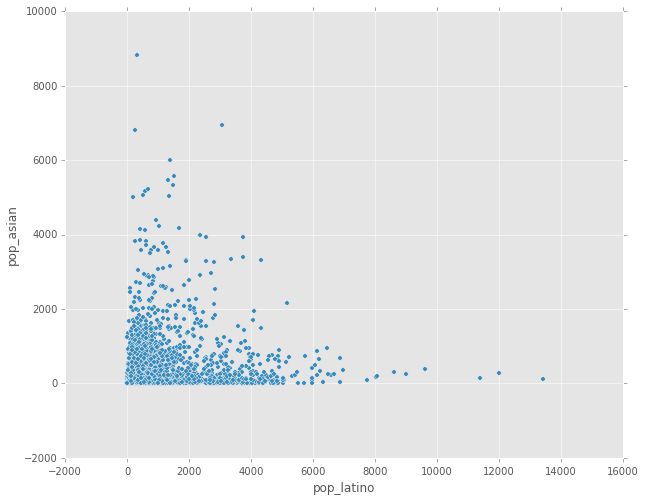

In [471]:
mpl.rcParams["figure.figsize"] = (10,8)
df.plot(kind='scatter', x='pop_latino', y='pop_asian')

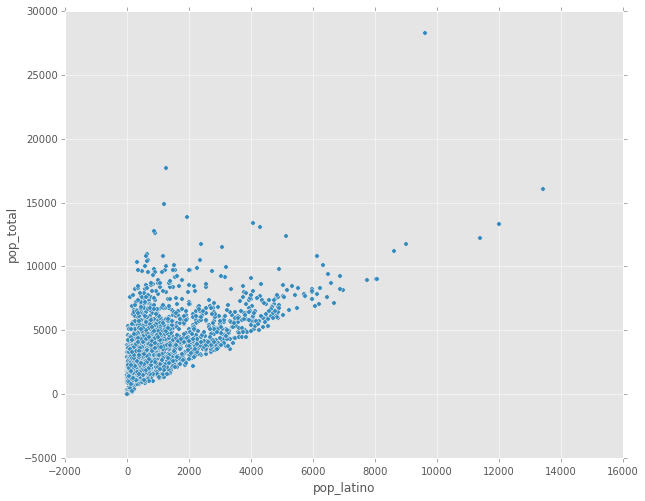

In [472]:
df.plot(kind='scatter', x='pop_latino', y='pop_total')

AttributeError: Unknown property s

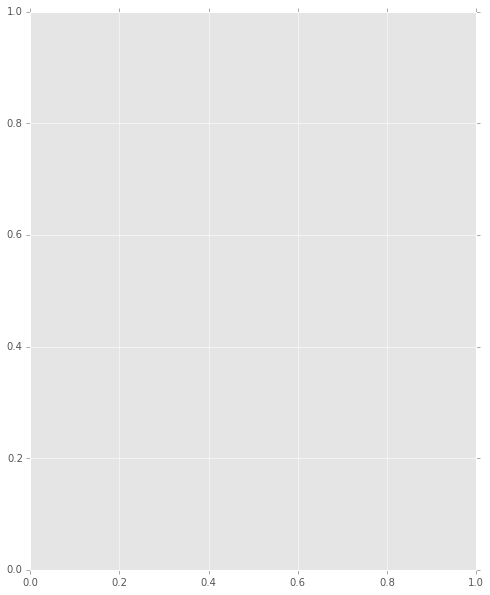

In [526]:
mpl.rcParams["figure.figsize"] = (8,10)
dfsub = df[df['pop_total'] > 0.0]  #dfsub used for plotting where pop_total > 0.0
dfsub.plot(kind='scatter', x='INTPTLONG', y='INTPTLAT',s=50*dfsub['pop_asian']/(dfsub['pop_asian']+dfsub['pop_latino']))


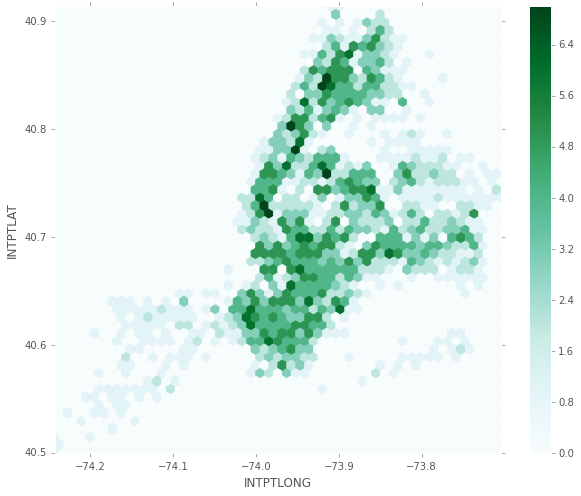

In [531]:
mpl.rcParams["figure.figsize"] = (10,8)
dfsub.plot(kind='hexbin', x='INTPTLONG', y='INTPTLAT',gridsize=50)

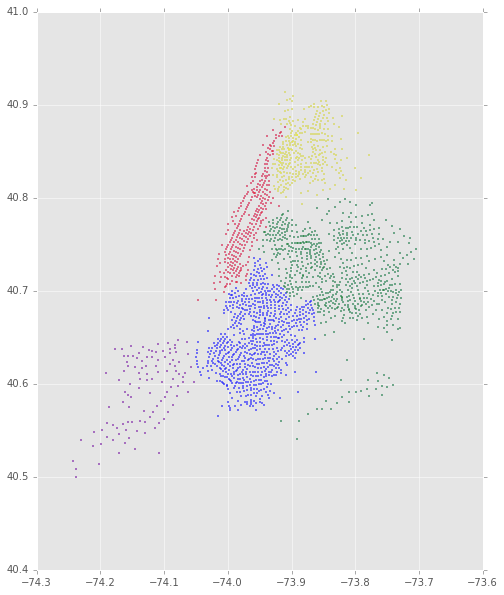

In [475]:
plt.scatter(nyc['INTPTLONG'],nyc['INTPTLAT'],s=2)
plt.scatter(nyc.ix["061"]['INTPTLONG'],nyc.ix["061"]['INTPTLAT'],s=2,color='red',alpha=0.5)
plt.scatter(nyc.ix["047"]['INTPTLONG'],nyc.ix["047"]['INTPTLAT'],s=2,color='blue',alpha=0.5)
plt.scatter(nyc.ix["081"]['INTPTLONG'],nyc.ix["081"]['INTPTLAT'],s=2,color='green',alpha=0.5)
plt.scatter(nyc.ix["085"]['INTPTLONG'],nyc.ix["085"]['INTPTLAT'],s=2,color='purple',alpha=0.5)
plt.scatter(nyc.ix["005"]['INTPTLONG'],nyc.ix["005"]['INTPTLAT'],s=2,color='yellow',alpha=0.5)

###Mean vs Median Income! 

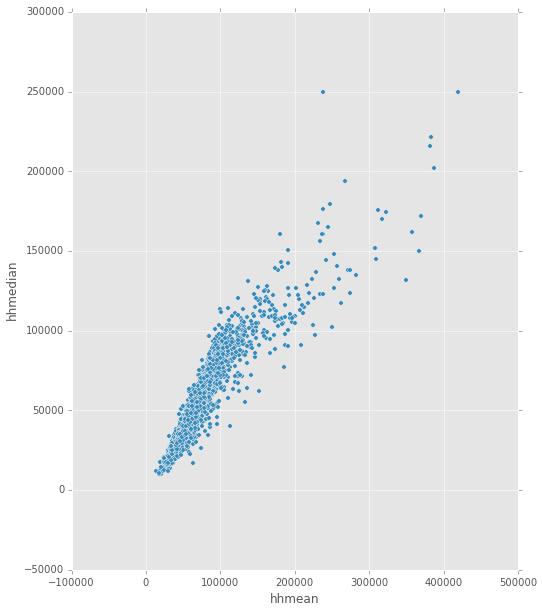

In [476]:
df.plot(kind='scatter', x='hhmean', y='hhmedian')

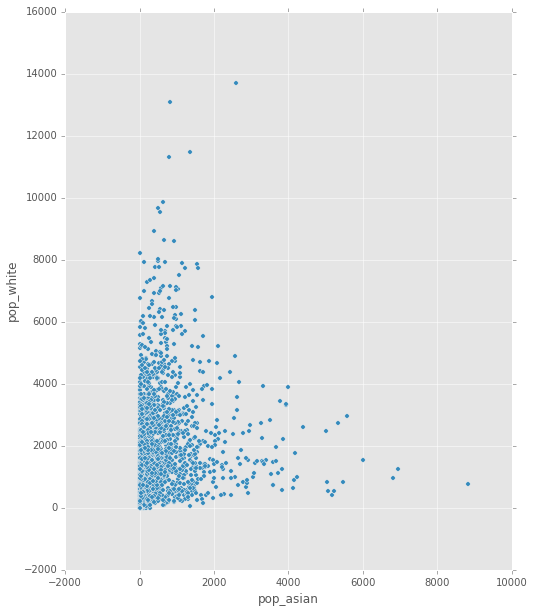

In [478]:
df.plot(kind='scatter', x='pop_asian', y='pop_white')

#SAVE CENSUS DATA to MYSQL! 

In [479]:
#df.to_json("../data/census_data.json")
#df.to_json()
df.head()

USPS        GEOID    ALAND   AWATER  ALAND_SQMI  \
COUNTY_ID TRACT_ID                                                   
005       000100     NY  36005000100  1672467  1032658       0.646   
          000200     NY  36005000200   455322   926899       0.176   
          000400     NY  36005000400   912391   602945       0.352   
          001600     NY  36005001600   485079        0       0.187   
          001900     NY  36005001900  1656134  1139660       0.639   

                    AWATER_SQMI   INTPTLAT  INTPTLONG STATE STATE_ID  \
COUNTY_ID TRACT_ID                                                     
005       000100          0.399  40.793492 -73.883532             36   
          000200          0.358  40.803486 -73.860438             36   
          000400          0.233  40.808915 -73.850488             36   
          001600          0.000  40.818848 -73.858076             36   
          001900          0.440  40.800999 -73.909373             36   

                       ...     pop6  pop7  pop8  pop9  pop_asian pop_black  \
COUNTY_ID TRACT_ID     ...                                                   
005       000100       ...      110    35     7     0        202      5388   
          000200       ...      219   337   214    94        259      1504   
          000400       ...      268   191   171    75        116      1568   
          001600       ...      350   486   284   123          0      1717   
          001900       ...       53   131    15     8         34       654   

                    pop_white  pop_native  pop_pacific  pop_latino  
COUNTY_ID TRACT_ID                                                  
005       000100         1361           0            0        3159  
          000200         1352          35            0        3236  
          000400         1339           0            0        3495  
          001600         1535           0            0        3692  
          001900          995           0            0        1567  

[5 rows x 46 columns]

In [480]:
from pandas.io import sql
import pymysql as mdb

#con = mdb.connect('localhost', 'root', '', 'census_db',
#        unix_socket="/opt/local/var/run/mysql56/mysqld.sock") #host, user, password, #database

In [492]:
#sql.write_frame(df, con=con, name='table_census', 
#               if_exists='replace', flavor='mysql')

#df.reset_index().to_sql("table_census", con = con, flavor='mysql', schema=None, if_exists='replace')

#Test SQL table

###remember for sql access, < mysql -u root -p > 

In [494]:
#con = mdb.connect('localhost', 'root', '', 'census_db',
#        unix_socket="/opt/local/var/run/mysql56/mysqld.sock") #host, user, password, #database

#with con: 
#    cur = con.cursor()
#    cur.execute("SELECT hhmean,hhmedian,pop_total FROM table_census")
#    rows = cur.fetchall()
#    for row in rows:
#        print row

In [493]:
#Now read in to pandas from sql
#df2 = pd.read_sql("table_census", con, coerce_float=True)

In [503]:
df.reset_index().to_json("../data/census_data.json",orient="records")

In [506]:
df2 = pd.read_json("../data/census_data.json")
df2.head(5)

,ALAND,ALAND_SQMI,AWATER,AWATER_SQMI,BOROUGH,COUNTY_ID,FRAC_LAND,GEOID,INTPTLAT,INTPTLONG,...,pop7,pop8,pop9,pop_asian,pop_black,pop_latino,pop_native,pop_pacific,pop_total,pop_white
0,1672467,0.646,1032658,0.399,Bronx,5,0.618259,36005000100,40.793492,-73.883532,...,35,7,0,202,5388,3159,0,0,9191,1361
1,455322,0.176,926899,0.358,Bronx,5,0.329413,36005000200,40.803486,-73.860438,...,337,214,94,259,1504,3236,35,0,4858,1352
2,912391,0.352,602945,0.233,Bronx,5,0.602105,36005000400,40.808915,-73.850488,...,191,171,75,116,1568,3495,0,0,5344,1339
3,485079,0.187,0,0.000,Bronx,5,1.000000,36005001600,40.818848,-73.858076,...,486,284,123,0,1717,3692,0,0,5215,1535
4,1656134,0.639,1139660,0.440,Bronx,5,0.592366,36005001900,40.800999,-73.909373,...,131,15,8,34,654,1567,0,0,2562,995


In [507]:
df2.set_index(['COUNTY_ID', 'TRACT_ID'],inplace=True,drop=True)

In [510]:
df2.ix[47]

,ALAND,ALAND_SQMI,AWATER,AWATER_SQMI,BOROUGH,FRAC_LAND,GEOID,INTPTLAT,INTPTLONG,LATMAX,...,pop7,pop8,pop9,pop_asian,pop_black,pop_latino,pop_native,pop_pacific,pop_total,pop_white
TRACT_ID,,,,,,,,,,,,,,,,,,,,,
100,224486,0.087,0,0.000,Brooklyn,1.000000,36047000100,40.700283,-73.994016,40.702417,...,485,285,105,314,309,522,49,0,4610,3532
200,276927,0.107,0,0.000,Brooklyn,1.000000,36047000200,40.653247,-74.011068,40.655617,...,68,4,4,0,161,1385,0,0,1612,503
301,214944,0.083,0,0.000,Brooklyn,1.000000,36047000301,40.696416,-73.997495,40.698504,...,295,208,265,188,237,356,18,0,4214,3385
501,83724,0.032,0,0.000,Brooklyn,1.000000,36047000501,40.695814,-73.994701,40.697117,...,213,137,70,398,299,223,0,0,4400,3467
502,96812,0.037,0,0.000,Brooklyn,1.000000,36047000502,40.695135,-73.992861,40.696535,...,211,96,55,180,67,177,0,0,2543,2084
700,174194,0.067,0,0.000,Brooklyn,1.000000,36047000700,40.692320,-73.997299,40.694199,...,241,157,29,156,50,275,0,0,3827,3440
900,161378,0.062,0,0.000,Brooklyn,1.000000,36047000900,40.691736,-73.991627,40.693544,...,151,53,32,412,227,313,0,0,4351,3312
1100,168508,0.065,0,0.000,Brooklyn,1.000000,36047001100,40.693290,-73.987709,40.695139,...,4,0,0,84,77,50,20,0,580,340
1300,291217,0.112,0,0.000,Brooklyn,1.000000,36047001300,40.697625,-73.988383,40.700055,...,203,63,21,314,302,386,0,0,2561,1647


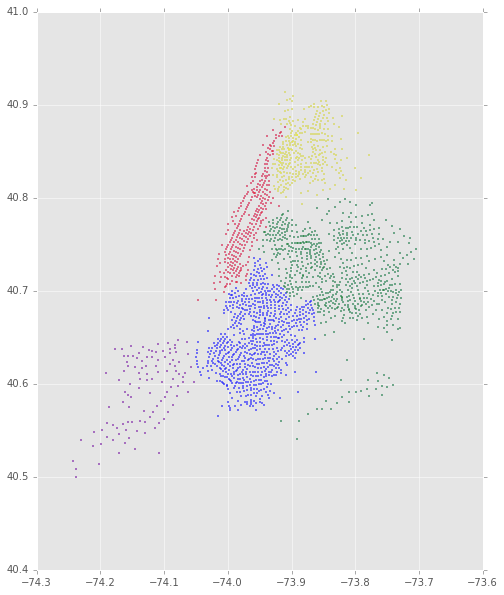

In [514]:
import matplotlib.pyplot as plt
plt.scatter(df2['INTPTLONG'],nyc['INTPTLAT'],s=2)
plt.scatter(df2.ix[61]['INTPTLONG'],df2.ix[61]['INTPTLAT'],s=2,color='red',alpha=0.5)
plt.scatter(df2.ix[47]['INTPTLONG'],df2.ix[47]['INTPTLAT'],s=2,color='blue',alpha=0.5)
plt.scatter(df2.ix[81]['INTPTLONG'],df2.ix[81]['INTPTLAT'],s=2,color='green',alpha=0.5)
plt.scatter(df2.ix[85]['INTPTLONG'],df2.ix[85]['INTPTLAT'],s=2,color='purple',alpha=0.5)
plt.scatter(df2.ix[5]['INTPTLONG'],df2.ix[5]['INTPTLAT'],s=2,color='yellow',alpha=0.5)

In [535]:
df.columns

Index([u'USPS', u'GEOID', u'ALAND', u'AWATER', u'ALAND_SQMI', u'AWATER_SQMI', u'INTPTLAT', u'INTPTLONG', u'STATE', u'STATE_ID', u'BOROUGH', u'LATMIN', u'LATMAX', u'LONGMIN', u'LONGMAX', u'ZIPCODE', u'FRAC_LAND', u'hh_total', u'hh1', u'hh2', u'hh3', u'hh4', u'hh5', u'hh6', u'hh7', u'hh8', u'hh9', u'hh10', u'hhmedian', u'hhmean', u'pop_total', u'pop1', u'pop2', u'pop3', u'pop4', u'pop5', u'pop6', u'pop7', u'pop8', u'pop9', u'pop_asian', u'pop_black', u'pop_white', u'pop_native', u'pop_pacific', u'pop_latino'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124ea8a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x126749910>]], dtype=object)

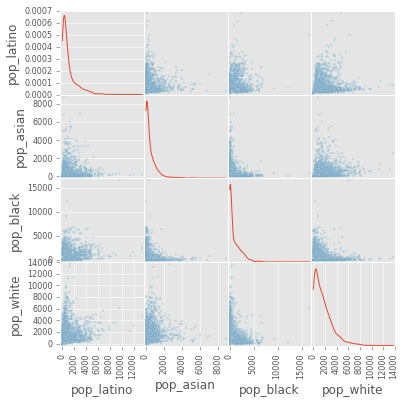

In [533]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df[['pop_latino','pop_asian','pop_black','pop_white']], alpha=0.2, figsize=(6, 6), diagonal='kde')

In [26]:
nyc.columns

Index([u'USPS', u'GEOID', u'ALAND', u'AWATER', u'ALAND_SQMI', u'AWATER_SQMI', u'INTPTLAT', u'INTPTLONG', u'STATE', u'STATE_ID', u'BOROUGH', u'LATMIN', u'LATMAX', u'LONGMIN', u'LONGMAX', u'ZIPCODE', u'FRAC_LAND'], dtype='object')